crease: 52
crescent_gap: 226
inclusion: 216
oil_spot: 204
punching_hole: 219
rolled_pit: 31
silk_spot: 650
waist_folding: 146
water_spot: 289
welding_line: 273

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
X = []
y = []
X_train = []
y_train = []
X_test = []
y_test = []
w = 56
l = 56

In [6]:
cd "C:\\Users\\Toqa Alaa\\PBL2\\gc10det"

C:\Users\Toqa Alaa\PBL2\gc10det


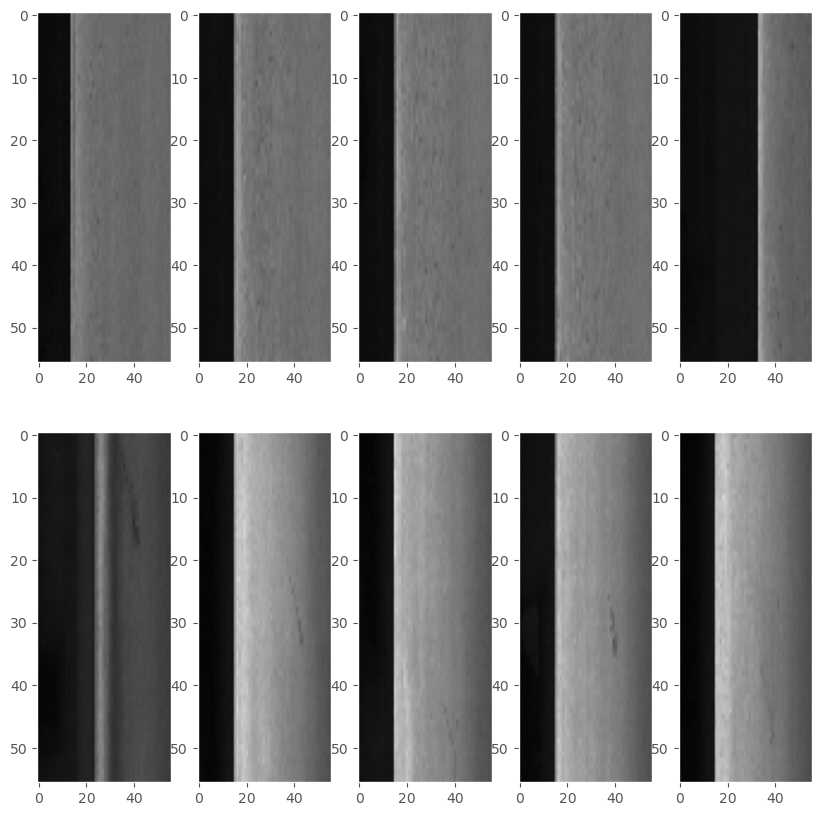

(56, 56, 3)


In [29]:
fig = plt.figure(figsize=(10, 10))
for i in range(1, 6):
    img = cv2.imread(fr'silk_spot/silk_spot ({i}).jpg')
    img = cv2.resize(img, (56, 56))
    fig.add_subplot(2, 5, i)
    plt.imshow(img, aspect = 'auto')
    plt.grid(False)
for i in range(6,11):
    img = cv2.imread(fr'water_spot/water_spot ({i}).jpg')
    img = cv2.resize(img, (56, 56))
    fig.add_subplot(2, 5, i)
    plt.imshow(img, aspect = 'auto')
    plt.grid(False)
plt.show()

print(img.shape)

In [9]:
for i in range(1, 651):
    img = cv2.imread(fr'silk_spot/silk_spot ({i}).jpg')
    img = cv2.resize(img, (l, w))
    X.append(img)
    y.append(0)

for i in range(1, 290):
    img = cv2.imread(fr'water_spot/water_spot ({i}).jpg')
    img = cv2.resize(img, (l, w))
    X.append(img)
    y.append(1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [11]:
X_train = np.array(X_train, dtype = 'float')
y_train = np.array(y_train, dtype = 'float').astype('float32').reshape((-1,1))
X_test = np.array(X_test, dtype = 'float')
y_test = np.array(y_test, dtype = 'float').astype('float32').reshape((-1,1))

In [12]:
n_classes = 2

X_train /= 255
X_test /= 255
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

In [13]:
model = Sequential()
model.add(Conv2D(56, kernel_size=(2,2), strides=(1,1), padding='valid', activation='relu', input_shape=(w,l,3)))
model.add(MaxPool2D(pool_size=(1,1)))

model.add(Flatten())

model.add(Dense(112, activation='relu'))
model.add(Dense(56, activation='relu'))
model.add(Dense(28, activation='relu'))

model.add(Dense(2, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [14]:
N = 100

H = model.fit(X_train, y_train, batch_size = 15, epochs = N, validation_data = (X_test, y_test))
model.save("model.h5")

Epoch 1/100
51/51 [==============================] - 13s 17ms/step - loss: 0.7358 - accuracy: 0.6937 - val_loss: 0.4875 - val_accuracy: 0.7234
Epoch 2/100
51/51 [==============================] - 0s 8ms/step - loss: 0.4160 - accuracy: 0.8109 - val_loss: 0.3673 - val_accuracy: 0.8351
Epoch 3/100
51/51 [==============================] - 0s 8ms/step - loss: 0.3547 - accuracy: 0.8296 - val_loss: 0.3740 - val_accuracy: 0.8404
Epoch 4/100
51/51 [==============================] - 0s 8ms/step - loss: 0.3365 - accuracy: 0.8442 - val_loss: 0.3552 - val_accuracy: 0.8617
Epoch 5/100
51/51 [==============================] - 0s 8ms/step - loss: 0.3237 - accuracy: 0.8495 - val_loss: 0.3592 - val_accuracy: 0.8511
Epoch 6/100
51/51 [==============================] - 0s 8ms/step - loss: 0.2903 - accuracy: 0.8549 - val_loss: 0.2869 - val_accuracy: 0.8617
Epoch 7/100
51/51 [==============================] - 0s 9ms/step - loss: 0.2656 - accuracy: 0.8748 - val_loss: 0.2863 - val_accuracy: 0.8191
Epoch 8/100

Epoch 59/100
51/51 [==============================] - 0s 8ms/step - loss: 0.0081 - accuracy: 0.9987 - val_loss: 0.6019 - val_accuracy: 0.9096
Epoch 60/100
51/51 [==============================] - 0s 8ms/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.6198 - val_accuracy: 0.9096
Epoch 61/100
51/51 [==============================] - 0s 8ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.6282 - val_accuracy: 0.9043
Epoch 62/100
51/51 [==============================] - 0s 8ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.6285 - val_accuracy: 0.9043
Epoch 63/100
51/51 [==============================] - 0s 8ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.6817 - val_accuracy: 0.9043
Epoch 64/100
51/51 [==============================] - 0s 8ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.6967 - val_accuracy: 0.9043
Epoch 65/100
51/51 [==============================] - 0s 8ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.7032 - val_accuracy: 0.9043
Epoch 

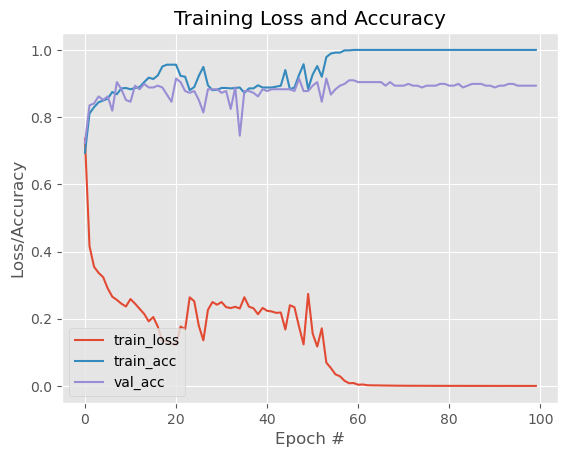

In [15]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

In [17]:
img_test = cv2.imread(r'water_spot/water_spot (50).jpg')
img_test = cv2.resize(img_test, (l, w))
img_test = [img_test]
img_test = np.array(img_test, dtype = 'float')
img_test /= 255
model.predict(img_test)

array([[1.0991301e-18, 1.0000000e+00]], dtype=float32)

In [18]:
DataSet_length= len(X)
incorrect_predictions= 0

for i in range(DataSet_length-1):
    random_image= X[i]
    real_val= y[i]
    random_img= X[i]
    random_img=[random_img]
    random_img = np.array(random_img, dtype = 'float')
    random_img/=255
    prediction = model.predict(random_img)
    yhat = np.argmax(prediction)
    if yhat!= real_val:
        incorrect_predictions+=1
        
print(incorrect_predictions)

20


In [19]:
print(DataSet_length)

939
